# Insitu Air Temperature trends assessment for climate monitoring

Production date: 10/10/2024

Produced by: Ana Oliveira (CoLAB +ATLANTIC)


## 🌍 Use case: Adaptation to Climate Extremes.

## ❓ Quality assessment questions
* **User Question: How well does gridded data derived from observations represent local exposure to heatwaves?**
* **How do EOBS air temperature extremes compare to those derived from reanalysis?**

In this Use Case we will access the E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations (henceforth, E-OBS) data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S) and analyse the spatial consistency between E-OBS and ERA5 regarding the amount of hot days (TX90p) and the amount of warm nights (TN90p), over a given Area of Interest (AoI), showcasing a regional example of European State of the Climate 2023 diagnostics accross two datasets. These climate indices are calculated according to the recommendations of the World Meteorological Organization (WMO)'s Expert Team on Sector-Specific Climate Indices (ET-SCI), in conjunction with sector experts. 

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note

* The study examined annual trends in heatrelated indices based on daily minimum and maximum temperatures (TN and TX, respectively) across the Iberian Peninsula using E-OBS and ERA5 datasets, comparing their fitness in capturing the number of warm nights (TN90p) and hot days (TX90p), following the guidelines of the World Meteorological Organization (WMO) Expert Team on Sector-specific Climate Indices (ET-SCI) changes over the complete time series length.

* E-OBS consistently demonstrates a higher amplitude of daily temperature values, reflected in higher TX and lower TN values over the full-time series. In particular, this translated into a bias of EOBS and ERA5 90th percentiles of TN and TX, which varies seasonally. Indeed, EOBS shows lower TN percentile 90th values during winter (circa 2ºC difference), and higher percentile 90th TX values during the summer (more than 2ºC).

* Nevertheless, both datasets are consistent in depicting warm nights and hot days indices, showing similar statistics and equivalent long-term linear trends. This indicates that extreme temperature indices based on absolute temperatures may be more precisely quantified using EOBS; conversely, those indices that are based on relative thresholds might showcase similar findings, offering a greater degree of confidence in the results obtained, due to the consistency between both datasets.

* In this case, warm nights are shown to be increasing by 5 days per decade (compared to the 1961-1990 reference period) while hot days have been increasing by more than 8 days per decade. Furthermore, daily anomalies of nocturnal and diurnal temperatures vary by, approximately, 0.1ºC/decade (TN90p, annual maximum) and 0.4ºC/decade (TX90p, annual maximum), respectively. These trends are consistent between EOBS and ERA5.

* Hence, this intercomparison underscores the importance of analysing the physical consistency among datasets, ensuring accurate detection of temperature extremes and informing robust climate analyses.  As observed by [Cornes et al. (2018)](https://doi.org/10.1029/2017JD028200), the importance of addressing uncertainties and improving data resolution to ensure comprehensive temperature assessments with high accuracy and completeness.
```

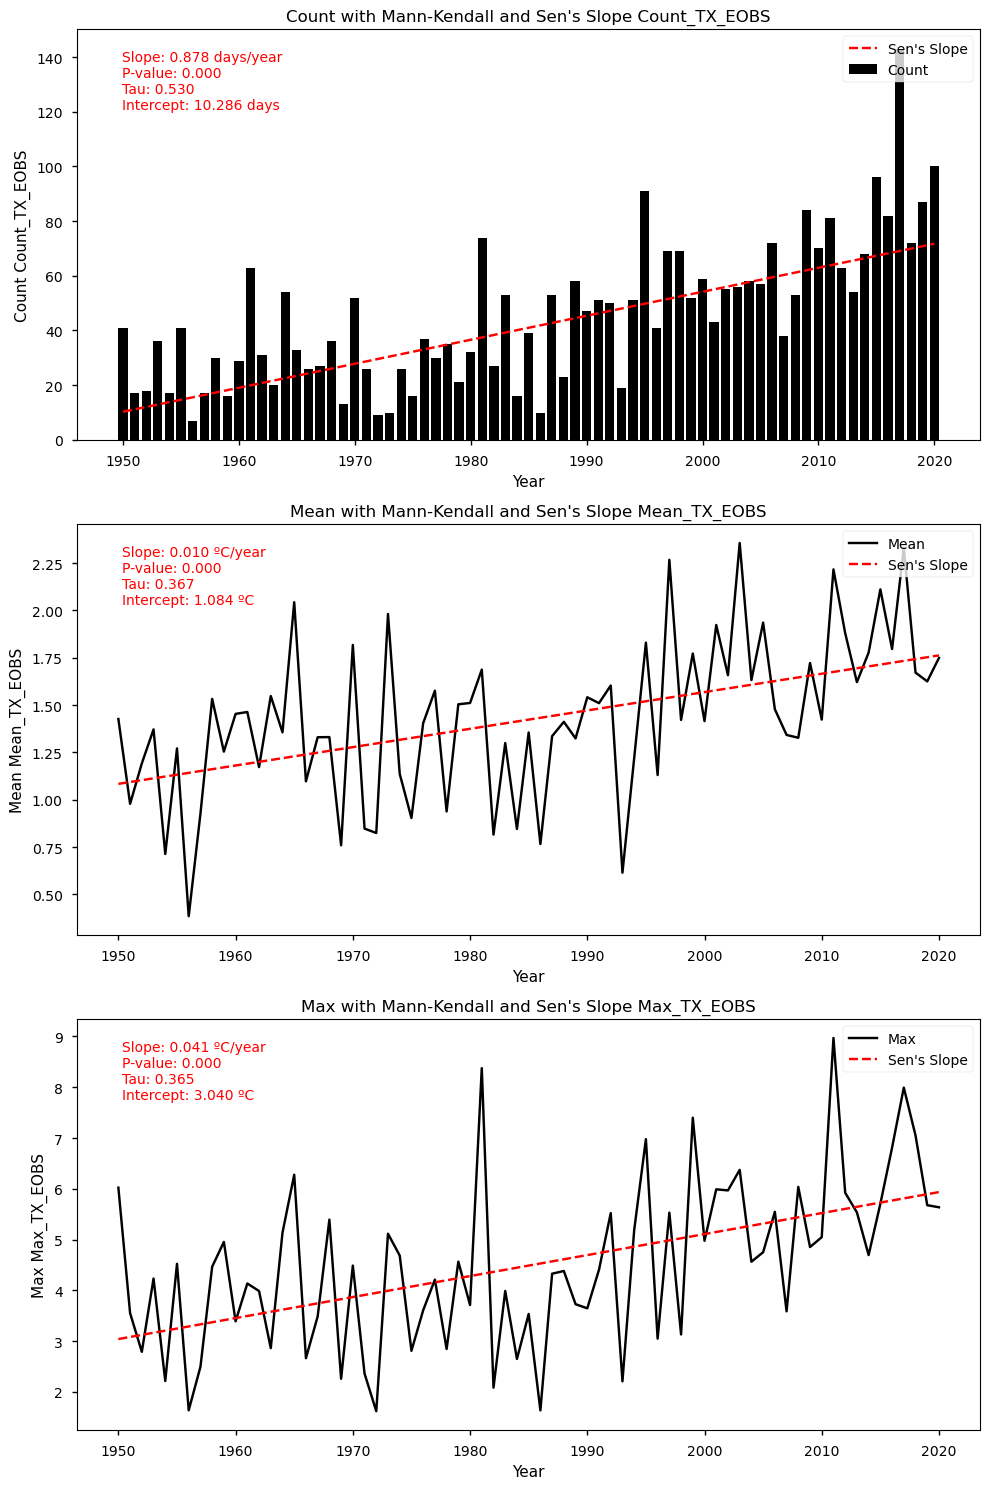

## 📋 Methodology

**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-1)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-1.1)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-1.2)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-1.3)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-2)**
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-3)**
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4)**
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.1)**
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.2)**
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.3)**
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.4)**
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.5)**
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-5)**

## 📈 Analysis and results

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-1)=
### 1. Define the AoI, search and download E-OBS

#### Import all the libraries/packages

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import pymannkendall as mk
from c3s_eqc_automatic_quality_control import download, utils, diagnostics, plot


plt.rcParams["figure.figsize"] = [15, 5]
plt.style.use("seaborn-v0_8-notebook")

import warnings
import os
warnings.filterwarnings("ignore")

#### Data Overview

To search for data, visit the CDS website: http://cds.climate.copernicus.eu. Here you can search for 'in-situ observations' using the search bar. The data we need for this tutorial is the E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations. This catalogue entry provides a daily gridded dataset of historical meteorological observations, covering Europe (land-only), from 1950 to the present. This data is derived from in-situ meteorological stations, made available through the European Climate Assessment & Dataset (ECA&D) project, as provided by National Meteorological and Hydrological Services (NMHSs) and other data-holding institutes. 

E-OBS comprises a set of spatially continuous Essential Climate Variables (ECVs) from the Surface Atmosphere, following the Global Climate Observing System (GCOS) convention, provided as the mean and spread of the spatial prediction ensemble algorithm, at regular latitude-longitude grid intervals (at a 0.1° and 0.25° spatial resolution), and covering a long time-period, from 1 January 1950 to present-day. In addition to the land surface elevation, E-OBS includes daily air temperature (mean, maximum and minimum), precipitation amount, wind speed, sea-level pressure and shortwave downwelling radiation. 

The latest E-OBS version, E-OBSv25.0e was released in April 2022 and its main difference from the previous E-OBSv24.0e is the amount of input data used.

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. In this Use Case, the ensemble mean of air temperature (TG), daily minimum temperature TN and daily maximum temperature TX will be used, considering the last version available. These can all be selected in the “Download data” tab from the CDS. In this tab a form appears in which we will select the following parameters to download, for example:

- Product Type: Ensemble mean  
- Variable: Mean temperature, Minimum temperature, Maximum temperature  
- Grid resolution: 0.25  
- Period: Full period  
- Version: 25.0e  
- Format: Zip file (.zip)

In addition, we will also download the ERA5 reanalysis, on single levels, to serve as a benchmark intercomparison. ERA5 is the fifth generation ECMWF reanalysis for the global climate and weather for the past 8 decades. Data is available from 1940 onwards. ERA5 replaces the ERA-Interim reanalysis Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using the laws of physics. As with E-OBS, ERA5 can be retrieved from the CDS. The parameters are as follows:

- Product Type: Ensemble mean  
- Variable: 2m air temperature  
- Period: 1950-2020 
- Time: hourly
- Format: NetCDF (.nc)

In each case, at the end of the download form, select `Show API request`. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook …

`Download data`
… having copied the API request to a Jupyter Notebook cell, running it will retrieve and download the data you requested into your local directory. However, before you run it, the `terms and conditions` of this particular dataset need to have been accepted directly at the CDS website. The option to view and accept these conditions is given at the end of the download form, just above the `Show API request` option. In addition, it is also useful to define the time period and AoI parameters and edit the request accordingly, as exemplified in the cells below.

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-1.1)=
### 1.1. Download and prepared E-OBS data

In [3]:
# Define request
request = (
    "insitu-gridded-observations-europe",
    {
        "format": "zip",
        "product_type": "ensemble_mean",
        "variable": "minimum_temperature",
        "grid_resolution": "0.25deg",
        "period": "full_period",
        "version": "25.0e",
        "area": [44, -10, 36, 1],
    },
)


# Process the request
tn_EOBS = download.download_and_transform(*request)

In [4]:
# Subset data for the year range 1950 to 2020
tn_EOBS = tn_EOBS.sel(time=slice('1950-01-01', '2020-12-31'))

# Inspect data
tn_EOBS

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 32, time: 25933)
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    tn         (time, latitude, longitude) float32 dask.array<chunksize=(25933, 32, 44), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:17:04 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [5]:
# Specify the old variable name
old_variable_name = 'tn'

# Specify the new variable name, long name and units
new_variable_name = 'TN EOBS'
new_long_name = 'Daily Minimum Temperature'
new_units = '°C'

# Change the variable name and long name
tn_EOBS  = tn_EOBS.rename({old_variable_name: new_variable_name})
tn_EOBS[new_variable_name].attrs['long_name'] = new_long_name
tn_EOBS[new_variable_name].attrs['units'] = new_units

tn_EOBS

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 32, time: 25933)
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TN EOBS    (time, latitude, longitude) float32 dask.array<chunksize=(25933, 32, 44), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:17:04 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

Download and prepare E-OBS daily maximum air temperature data (TX)

In [6]:
# Define request
request = (
    "insitu-gridded-observations-europe",
    {
        "format": "zip",
        "product_type": "ensemble_mean",
        "variable": "maximum_temperature",
        "grid_resolution": "0.25deg",
        "period": "full_period",
        "version": "25.0e",
        "area": [44, -10, 36, 1],
    },
)

# Process the request
tx_EOBS = download.download_and_transform(*request)

Now that we have downloaded the data, we can inspect it. We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an xarra dataset. We will print both TX and TN.

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-1.2)=
### 1.2. Basic statistics
To understand better the E-OBS data structure and check the aggregated Daily Mean Temperature (TG), we will first need to retrieve the TG variable from the multidimensional netCDF data structure and calculate the descriptive statistics.

In [7]:
# Subset data for the year range 1950 to 2020
tx_EOBS = tx_EOBS.sel(time=slice('1950-01-01', '2020-12-31'))

# Inspect data
tx_EOBS

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 32, time: 25933)
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    tx         (time, latitude, longitude) float32 dask.array<chunksize=(25933, 32, 44), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:22:21 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

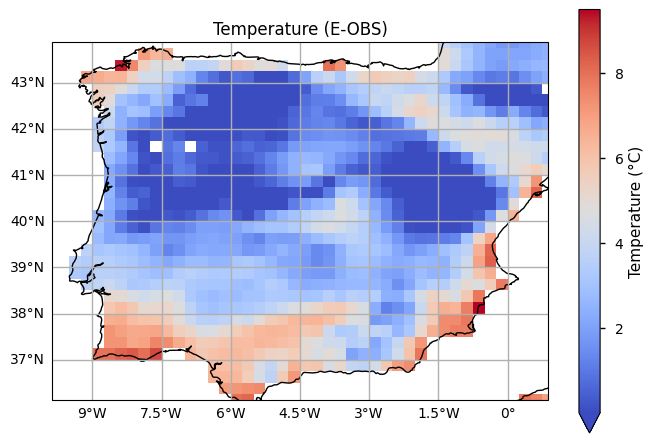

In [8]:
# Select a single time step
single_time_step = tn_EOBS.isel(time=0)  # Assuming you want the first time step

def plot_maps(da, **kwargs):
    # Get longitude and latitude extents
    lon_min, lon_max = np.min(da.longitude), np.max(da.longitude)
    lat_min, lat_max = np.min(da.latitude), np.max(da.latitude)
    
    # Plot using PlateCarree projection
    facet = da.plot.pcolormesh(
        subplot_kws={"projection": ccrs.PlateCarree()}, 
        transform=ccrs.PlateCarree(),
        **kwargs
    )
    
    # Set extent, add coastlines, and gridlines
    ax = facet.axes
    ax.set_extent(
        [lon_min, lon_max, lat_min, lat_max],
        crs=ccrs.PlateCarree(),
    )
    ax.coastlines(lw=1)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False

# Plot the selected time step
plot_maps(single_time_step['TN EOBS'].where(single_time_step['TN EOBS'] != 0), 
          cmap='coolwarm', vmin=0.01, cbar_kwargs={'label': 'Temperature (°C)'})
plt.title('Temperature (E-OBS)')
plt.show()

In [9]:
# Specify the old variable name
old_variable_name = 'tx'

# Specify the new variable name, long name and units
new_variable_name = 'TX EOBS'
new_long_name = 'Daily Maximum Temperature'
new_units = '°C'

# Change the variable name and long name
tx_EOBS  = tx_EOBS.rename({old_variable_name: new_variable_name})
tx_EOBS[new_variable_name].attrs['long_name'] = new_long_name
tx_EOBS[new_variable_name].attrs['units'] = new_units

tx_EOBS

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 32, time: 25933)
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TX EOBS    (time, latitude, longitude) float32 dask.array<chunksize=(25933, 32, 44), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:22:21 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

We can see from the data structure that our variables, TN and TX, are already stored in a four-dimensional array with dimensions: 25933 days in 'time', 21 steps in 'latitude', and 13 steps in 'longitude'.

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-1.3)=
### 1.3. Download ERA5 data

Download and prepare ERA5 hourly air temperature data. Due to the data size, it is best to split the request by decades. We will also inspect the data following the previous steps.

In [10]:
# Define time interval
start = "1950-01"
stop = "1970-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}


requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_0 = download.download_and_transform(collection_id, requests, chunks={"year": 1})

100%|██████████| 21/21 [00:00<00:00, 103.93it/s]


In [11]:

# Define time interval
start = "1971-01"
stop = "1980-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_1 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|██████████| 10/10 [00:00<00:00, 82.00it/s]


In [12]:

# Define time interval
start = "1981-01"
stop = "1990-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_2 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|██████████| 10/10 [00:00<00:00, 109.36it/s]


In [13]:

# Define time interval
start = "1991-01"
stop = "2000-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_3 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|██████████| 10/10 [00:00<00:00, 108.62it/s]


In [14]:

# Define time interval
start = "2001-01"
stop = "2010-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_4 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|██████████| 10/10 [00:00<00:00, 114.80it/s]


In [15]:

# Define time interval
start = "2011-01"
stop = "2020-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}



requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA_5 = download.download_and_transform(collection_id, requests, chunks={"year": 1})

100%|██████████| 10/10 [00:00<00:00, 97.52it/s]


In [16]:
#Merge all the ERA5 datasets downloaded (to have a complete one: from 1950-2020)

datasets = [ds_ERA5_0, ds_ERA5_1, ds_ERA5_2, ds_ERA5_3, ds_ERA5_4, ds_ERA_5]

# Optionally sort datasets by time if needed
datasets_sorted = sorted(datasets, key=lambda ds: ds['time'].min().values)

# Concatenate along the time dimension
ds_ERA5 = xr.concat(datasets_sorted, dim='time')

ds_ERA5

<xarray.Dataset>
Dimensions:    (longitude: 23, latitude: 17, time: 207464)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 ... 2020-12-31T21:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(2920, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-07 07:21:06 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

We can see from the data structure that our variable, hourly T2m, is also stored in a four-dimensional array, but has time steps: 25933 hours in 'time', 17 steps in 'latitude', and 23 steps in 'longitude'. Also, air temperature is shown in Kelvin, and needs to be converted to Celsius degrees, as follows.

In [17]:
# Convert Kelvin to Celsius
ds_ERA5["t2m"] = ds_ERA5["t2m"] - 273.15


Considering that this is a very big dataset, we can also store it locally, to avoid downloading time in future analysis.

In [18]:
# save datasets
ds_ERA5.to_netcdf('ERA5_singlelevels_TMP2m_1950_2020.nc',format='NETCDF4')

Having done this, we will resample ERA5 hourly data to get the daily minimum and maximum air temperatures (TN and TX, respectively).

In [19]:
# Resample to daily frequency and choose the aggregation method (minimum in this case)
tn_ERA5 = ds_ERA5.resample(time='1D').min(dim='time')

# Resample to daily frequency and choose the aggregation method (maximum in this case)
tx_ERA5 = ds_ERA5.resample(time='1D').max(dim='time')

tx_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 17, longitude: 23)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(365, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-07 07:21:06 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [20]:
# Specify the old variable name
old_variable_name = 't2m'

# Specify the new variable name, long name and units
new_variable_name = 'TN ERA5'
new_long_name = 'Daily Minimum Temperature'
new_units = '°C'

# Change the variable name and long name
tn_ERA5  = tn_ERA5.rename({old_variable_name: new_variable_name})
tn_ERA5[new_variable_name].attrs['long_name'] = new_long_name
tn_ERA5[new_variable_name].attrs['units'] = new_units

tn_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 17, longitude: 23)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TN ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(365, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-07 07:21:06 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [21]:
# Specify the old variable name
old_variable_name = 't2m'

# Specify the new variable name, long name and units
new_variable_name = 'TX ERA5'
new_long_name = 'Daily Maximum Temperature'
new_units = '°C'


# Change the variable name and long name
tx_ERA5  = tx_ERA5.rename({old_variable_name: new_variable_name})
tx_ERA5[new_variable_name].attrs['long_name'] = new_long_name
tx_ERA5[new_variable_name].attrs['units'] = new_units

tx_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 17, longitude: 23)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TX ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(365, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-07 07:21:06 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

We can see from the data structure that our variables, TN and TX, are then stored in a four-dimensional array, but spatial dimensions differ from E-OBS: 25933 days in 'time', 17 steps in 'latitude', and 23 steps in 'longitude'.

To ensure spatial consistency, we need to interpolate ERA5 to the E-OBS grid.

In [22]:

# Interpolate ERA5 Minimum Temperature (tn) to match E-OBS resolution (e.g., from 0.5x0.5 to 0.25x0.25)
tn_ERA5 = tn_ERA5.interp_like(tn_EOBS)

tn_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 32, longitude: 44)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
Data variables:
    TN ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(25933, 32, 44), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-07 07:21:06 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [23]:

# Interpolate ERA5 Maximum Temperature (tx) to match E-OBS resolution (e.g., from 0.5x0.5 to 0.25x0.25)
tx_ERA5 = tx_ERA5.interp_like(tx_EOBS)

tx_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 32, longitude: 44)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
Data variables:
    TX ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(25933, 32, 44), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-07 07:21:06 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

We can see that now the dimensions are consistent between both datasets, and may proceed with merging TN and TX.

In [24]:
# Merge the two datasets using latitude and longitude as coordinates
merged_tn = xr.merge([tn_EOBS, tn_ERA5], join='left')

#to improve computational efficiency
merged_tn['TN ERA5'] = merged_tn['TN ERA5'].chunk({'time': 365})

merged_tx = xr.merge([tx_EOBS, tx_ERA5], join='left')

#change chunk sizes for the data in the xarray
merged_tx['TX ERA5'] = merged_tx['TX ERA5'].chunk({'time': 365})

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-2)=
### 2. Inspect and view data

#### Create a set of weights based on latitude values
The weighted method is used to create a weighted dataset. Any subsequent aggregation operations (such as mean, sum, etc.) will take these weights into account.
These weights can be used to account for the varying area of grid cells in latitude-longitude grids to ensure that calculations properly account for varying areas represented by grid cells at different latitudes. 

Now we will proceed with merging TN and TX variables from both datasets.

In [25]:
weights = np.cos(np.deg2rad(merged_tn.latitude))
weights.name = "weights"

merged_tn_weighted = merged_tn.weighted(weights)
mean_tn = merged_tn_weighted.mean(("longitude", "latitude"))

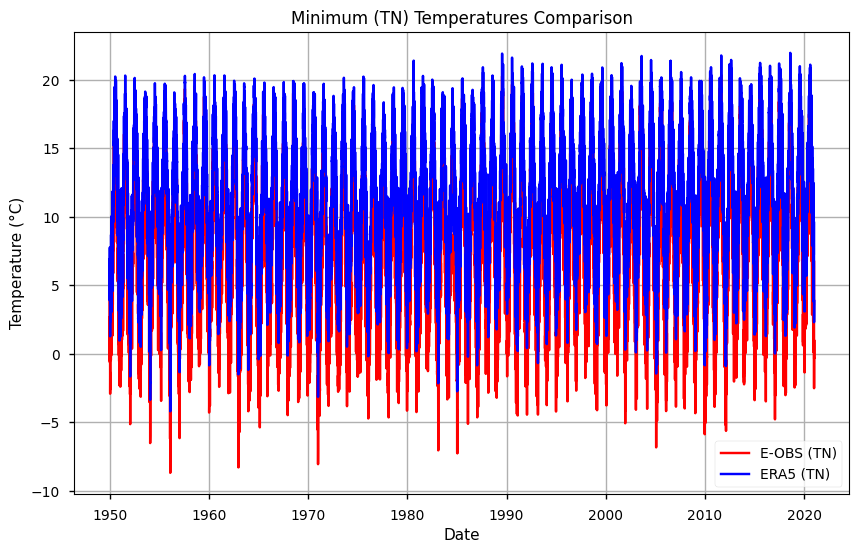

In [26]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Minimum (TN) Temperatures Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(mean_tn.time, mean_tn['TN EOBS'], label='E-OBS (TN)', color='red')
plt.plot(mean_tn.time, mean_tn['TN ERA5'], label='ERA5 (TN)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#### Merge the two TX datasets using latitude and longitude as coordinates


In [27]:
weights = np.cos(np.deg2rad(merged_tx.latitude))
weights.name = "weights"

merged_tx_weighted = merged_tx.weighted(weights)
mean_tx = merged_tx_weighted.mean(("longitude", "latitude"))

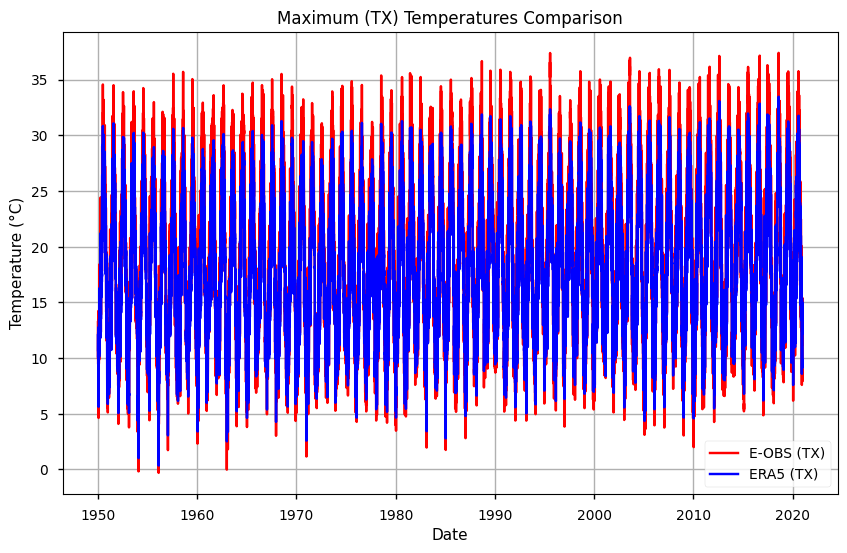

In [28]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Maximum (TX) Temperatures Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(mean_tx.time, mean_tx['TX EOBS'], label='E-OBS (TX)', color='red')
plt.plot(mean_tx.time, mean_tx['TX ERA5'], label='ERA5 (TX)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


From both plots, results suggest that E-OBS temperatures reach more extreme values: i.e., TN is lowest and TX is highest in E-OBS, compared to ERA5. This agrees with previous results that suggest some smoothing in reanalysis, compared to observations. 

To better inspect these results, having seen the full time series, let's discover and plot the years in which the E-OBS TN is the lowest, and the E-OBS TX is the highest.

In [29]:
#Resample the data to yearly means
yearly_means_tn = mean_tn['TN EOBS'].resample(time='Y').mean()

#Find the year with the minimum mean value
min_year_index = yearly_means_tn.argmin().values
min_year = yearly_means_tn.time[min_year_index].dt.year.values

print(f"he year with the maximum mean annual 'TN' is: {min_year}")

he year with the maximum mean annual 'TN' is: 1956


In [30]:
#Resample the data to yearly means
yearly_means_tx = mean_tx['TX EOBS'].resample(time='Y').mean()

#Find the year with the minimum mean value
max_year_index = yearly_means_tx.argmax().values
max_year = yearly_means_tx.time[max_year_index].dt.year.values

print(f"The year with the maximum mean annual 'TX' is: {max_year}")

The year with the maximum mean annual 'TX' is: 2017


We can now subset and plot the selected years, as follows.

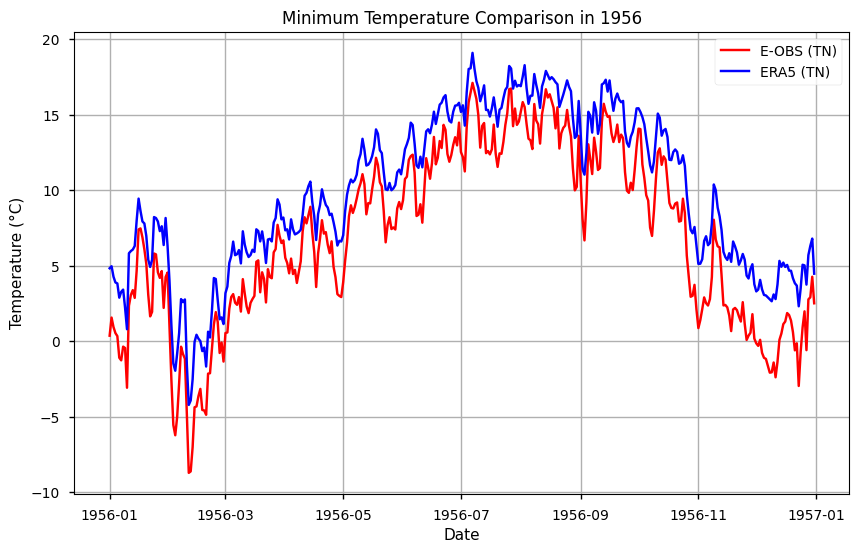

In [31]:
# Subset the year with lowest TN
min_temp_year = str(min_year)
subset_tn = mean_tn.sel(time=min_temp_year)

# Plot the data
plt.figure(figsize=(10, 6))
plt.title(f'Minimum Temperature Comparison in {min_temp_year}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(subset_tn.time, subset_tn['TN EOBS'], label='E-OBS (TN)', color='red')
plt.plot(subset_tn.time, subset_tn['TN ERA5'], label='ERA5 (TN)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


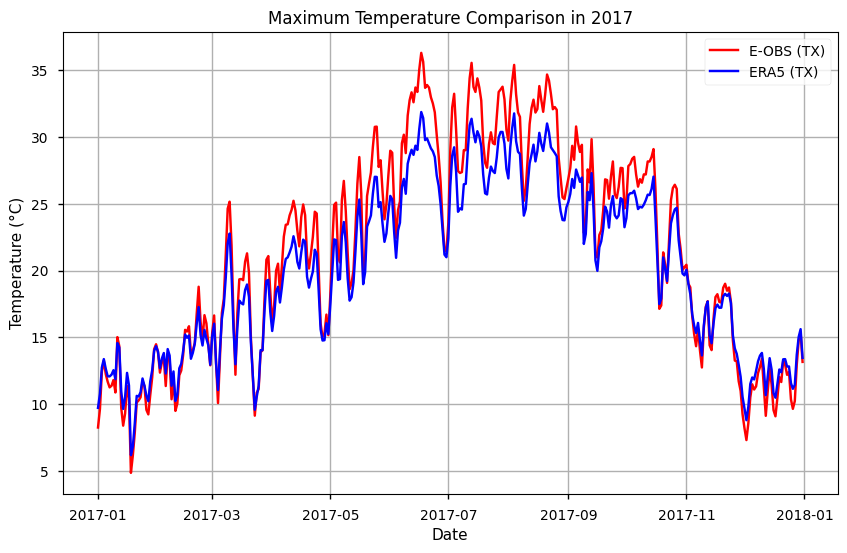

In [32]:
# Subset the year with highest TX
max_temp_year = str(max_year)
subset_tx = mean_tx.sel(time=max_temp_year)

# Plot the data
plt.figure(figsize=(10, 6))
plt.title(f'Maximum Temperature Comparison in {max_temp_year}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(subset_tx.time, subset_tx['TX EOBS'], label='E-OBS (TX)', color='red')
plt.plot(subset_tx.time, subset_tx['TX ERA5'], label='ERA5 (TX)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


To facilitate any further time series analysis, let's save the data into .csv and .nc formats

In [33]:
# Save as NetCDF for inspecting spatially averaged data
mean_tn.to_netcdf('TN_EOBS_ERA5_merged_IBI.nc')
# Convert xarray dataset to pandas DataFrame
df = mean_tn.to_dataframe()
df.to_csv('TN_EOBS_ERA5_merged_weighted_mean_IBI.csv')

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-3)=
### 3. Calculation of 90-Percentile for E-OBS and ERA5


Following the guidelines from the WMO's ET-SCI, the amount of hot days (TX90p) and amount of warm nights (TN90p) indices are based on daily differences form the 90th percentile of TX and TN, respectively, using the 1961-1990 climatology, which allows for a better intercomparison with existing studies.

We will start by calculating and plotting the TN90p.

In [34]:
# Subset accoding to reference period
start_date = '1961-01-01'
end_date = '1990-12-31'

# Extract the 'dayofyear' information
merged_tn['dayofyear'] = merged_tn['time.dayofyear']

# Subset the dataset for the specified date range
ref_clim_tn = merged_tn.sel(time=slice(start_date, end_date))

ref_clim_tn = ref_clim_tn.chunk({'time': -1})

ref_clim_tn

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 32, time: 10957)
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1990-12-31
Data variables:
    TN EOBS    (time, latitude, longitude) float32 dask.array<chunksize=(10957, 32, 44), meta=np.ndarray>
    TN ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(10957, 32, 44), meta=np.ndarray>
    dayofyear  (time) int64 dask.array<chunksize=(10957,), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:17:04 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [35]:
# The 90th percentile of the daily data is computed for each day of the year within the date range
p90_data_tn = ref_clim_tn.groupby('dayofyear').quantile(0.9, dim='time')
p90_data_tn

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 32, dayofyear: 366)
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TN EOBS    (dayofyear, latitude, longitude) float64 dask.array<chunksize=(1, 32, 44), meta=np.ndarray>
    TN ERA5    (dayofyear, latitude, longitude) float64 dask.array<chunksize=(1, 32, 44), meta=np.ndarray>

In [36]:
# The percentile data is weighted to account for latitude-related variations
p90_data_weighted_tn = p90_data_tn.weighted(weights)
p90_data_weighted_tn

DatasetWeighted with weights along dimensions: latitude

In [37]:
# The mean of the weighted data is calculated over longitude and latitude, resulting in a time series of averaged 90th percentile values for each day of the year.
p90_tn_ts = p90_data_weighted_tn.mean(("longitude", "latitude"))
p90_tn_ts

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TN EOBS    (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TN ERA5    (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>

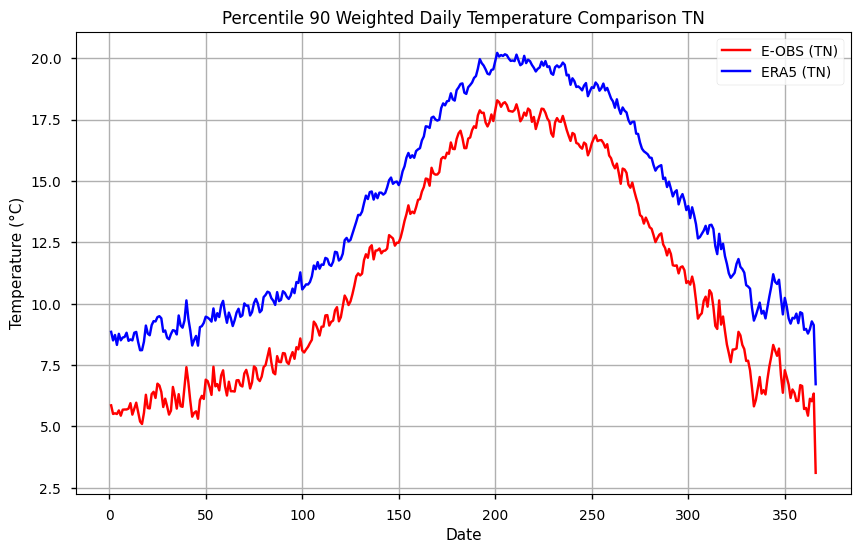

In [38]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Percentile 90 Weighted Daily Temperature Comparison TN')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot the data
plt.plot(p90_tn_ts.dayofyear, p90_tn_ts['TN EOBS'], label='E-OBS (TN)', color='red')
plt.plot(p90_tn_ts.dayofyear, p90_tn_ts['TN ERA5'], label='ERA5 (TN)', color='blue')

# Add a legend
plt.legend()


# Show the plot
plt.grid(True)
plt.show()


We can see from this plot that the reference 90th threshold from the ERA5 has lower values. As a next step, we can smooth the climatological reference by using a moving average. Here, we employ a 7-days sliding window.

In [39]:
# Append the first and last 7 days to handle smoothing at the day-of-year extremes
first_days = p90_data_tn.isel(dayofyear=slice(-7, None))
last_days = p90_data_tn.isel(dayofyear=slice(None, 7))

extended_percentile_90_tn = xr.concat([last_days, p90_data_tn, first_days], dim='dayofyear')

# Apply a 15-day moving average
smoothed_percentile_90_tn = extended_percentile_90_tn.rolling(dayofyear=15, center=True).mean()

# Remove the extra days to get back to 366 days
smoothed_percentile_90_tn = smoothed_percentile_90_tn.isel(dayofyear=slice(7, -7))

# Apply weights
p90_data_weighted_tn = smoothed_percentile_90_tn.weighted(weights)

# Calculate the mean over latitude and longitude
p90_tn_ts_smooth = p90_data_weighted_tn.mean(("longitude", "latitude"))


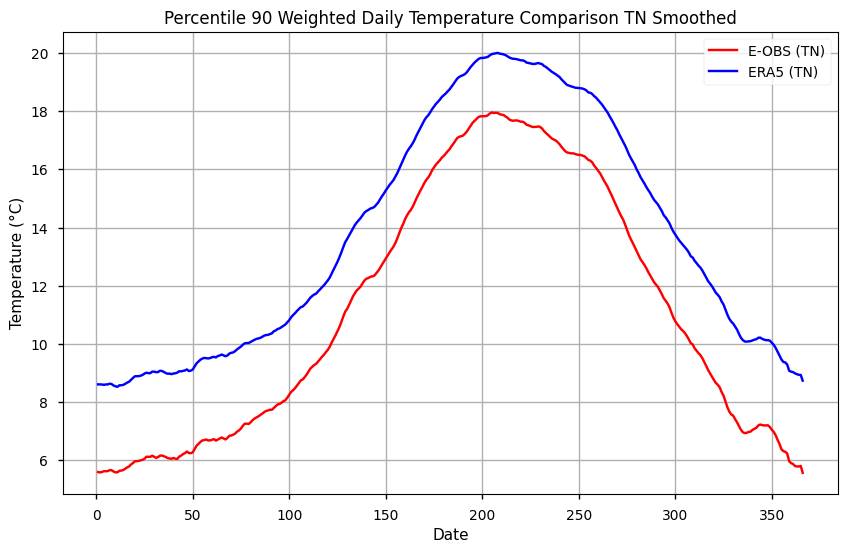

In [40]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Percentile 90 Weighted Daily Temperature Comparison TN Smoothed')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot the data
plt.plot(p90_tn_ts_smooth.dayofyear, p90_tn_ts_smooth['TN EOBS'], label='E-OBS (TN)', color='red')
plt.plot(p90_tn_ts_smooth.dayofyear, p90_tn_ts_smooth['TN ERA5'], label='ERA5 (TN)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

During winter, TN90p is up to 2ºC cooler in E-OBS, compared to ERA5. This difference is smaller during the summer, at approximately 1ºC, which indicates the importance of seasonality on comparing both datasets regarding nocturnal extremes.

We can now replicate these steps for the TX90p.

In [41]:
# Subset accoding to reference period
start_date = '1961-01-01'
end_date = '1990-12-31'

# Extract the 'dayofyear' information
merged_tx['dayofyear'] = merged_tx['time.dayofyear']

# Subset the dataset for the specified date range
ref_clim_tx = merged_tx.sel(time=slice(start_date, end_date))

ref_clim_tx = ref_clim_tx.chunk({'time': -1})

ref_clim_tx

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 32, time: 10957)
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1990-12-31
Data variables:
    TX EOBS    (time, latitude, longitude) float32 dask.array<chunksize=(10957, 32, 44), meta=np.ndarray>
    TX ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(10957, 32, 44), meta=np.ndarray>
    dayofyear  (time) int64 dask.array<chunksize=(10957,), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:22:21 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [42]:
# The 90th percentile of the daily data is computed for each day of the year within the date range
p90_data_tx = ref_clim_tx.groupby('dayofyear').quantile(0.9, dim='time')
p90_data_tx

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 32, dayofyear: 366)
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TX EOBS    (dayofyear, latitude, longitude) float64 dask.array<chunksize=(1, 32, 44), meta=np.ndarray>
    TX ERA5    (dayofyear, latitude, longitude) float64 dask.array<chunksize=(1, 32, 44), meta=np.ndarray>

In [43]:
# The percentile data is weighted to account for latitude-related variations
p90_data_weighted_tx = p90_data_tx.weighted(weights)
p90_data_weighted_tx

DatasetWeighted with weights along dimensions: latitude

In [44]:
#  The mean of the weighted data is calculated over longitude and latitude, resulting in a time series of averaged 90th percentile values for each day of the year.
p90_tx_ts = p90_data_weighted_tx.mean(("longitude", "latitude"))
p90_tx_ts

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TX EOBS    (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TX ERA5    (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>

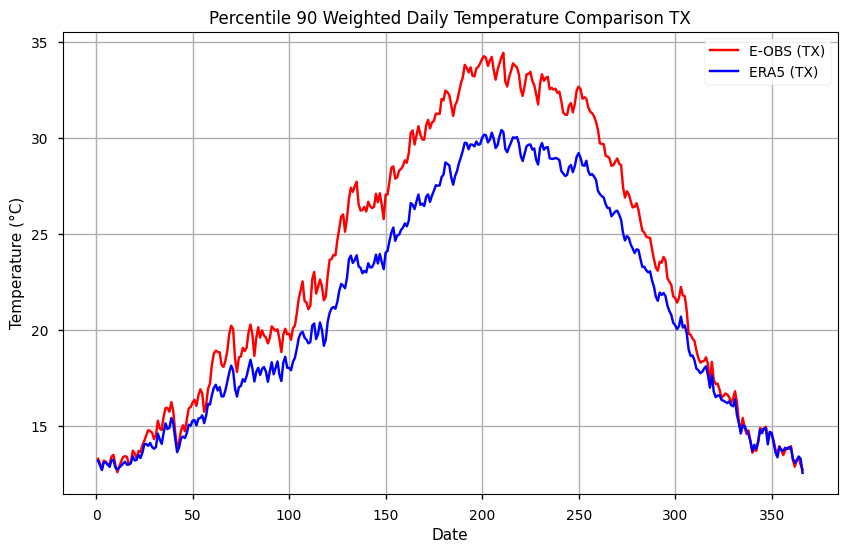

In [45]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Percentile 90 Weighted Daily Temperature Comparison TX')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot the data
plt.plot(p90_tx_ts.dayofyear, p90_tx_ts['TX EOBS'], label='E-OBS (TX)', color='red')
plt.plot(p90_tx_ts.dayofyear, p90_tx_ts['TX ERA5'], label='ERA5 (TX)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


As with TN, the TX is shown to have highest values on E-OBS, specially during the summer season. Like before, we will smooth the climatological reference by using a moving average. Here, we employ a 7-days sliding window.

In [46]:
# Append the first and last 7 days to handle smoothing at the day-of-year extremes
first_days = p90_data_tx.isel(dayofyear=slice(-7, None))
last_days = p90_data_tx.isel(dayofyear=slice(None, 7))

extended_percentile_90_tx = xr.concat([last_days, p90_data_tx, first_days], dim='dayofyear')

# Apply a 15-day moving average
smoothed_percentile_90_tx = extended_percentile_90_tx.rolling(dayofyear=15, center=True).mean()

# Remove the extra days to get back to 366 days
smoothed_percentile_90_tx = smoothed_percentile_90_tx.isel(dayofyear=slice(7, -7))

# Apply weights
p90_data_weighted_tx = smoothed_percentile_90_tx.weighted(weights)

# Calculate the mean over latitude and longitude
p90_tx_ts_smooth = p90_data_weighted_tx.mean(("longitude", "latitude"))

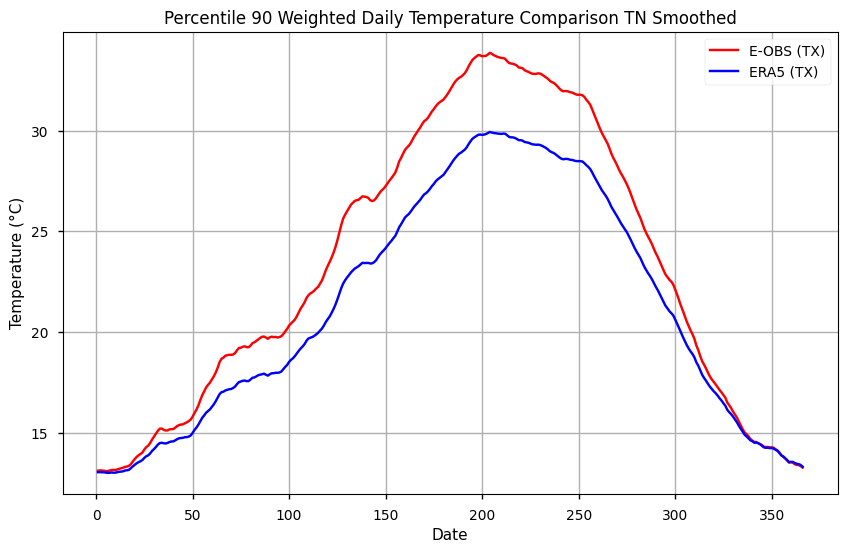

In [47]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Percentile 90 Weighted Daily Temperature Comparison TN Smoothed')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot the data
plt.plot(p90_tx_ts_smooth.dayofyear, p90_tx_ts_smooth['TX EOBS'], label='E-OBS (TX)', color='red')
plt.plot(p90_tx_ts_smooth.dayofyear, p90_tx_ts_smooth['TX ERA5'], label='ERA5 (TX)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

During summer, TX90p is more than 2ºC warmer in E-OBS, compared to ERA5. This difference is smaller during the winter, lower than 1ºC, which indicates the importance of seasonality on comparing both datasets regarding diurnal extremes.

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4)=
### 4. Trend Analysis and Intercomparison
As shown before, E-OBS and ERA5 showcase different temperature ranges in absolute and relative values. To check whether this influences the quantification of hot days and amount of warm nights, and its changes, we need to calculate the amount of days above the 90th percentiles calculated before. The resulting differences, or anomalies, are than agregated by year to produce descriptive statistics and linear trend analysis.

#### Calculation of the daily deviations from the 90th percentiles

In [48]:

# Extract the dayofyear from the time dimension in mean_tn
dayofyear = mean_tn['time'].dt.dayofyear

#use these dayofyear values to select the corresponding 90th percentile values from the p90_tn_ts_smooth xarray,
#aligning them with the time dimension of mean_tn.
p90_tn_eobs_expanded = p90_tn_ts_smooth['TN EOBS'].sel(dayofyear=dayofyear)

# Create the anomalies by subtracting the p90 values from the mean_tn values for the EOBS dataset
anomalia_tn_eobs = mean_tn['TN EOBS'] - p90_tn_eobs_expanded

# Create the DataFrame
df_anomalies_tn_eobs = pd.DataFrame({
    'Date': mean_tn['time'].values,
    'daily_weighted': mean_tn['TN EOBS'].values,
    'p90_weighted': p90_tn_eobs_expanded.values,
    'anomaly': anomalia_tn_eobs.values
})

In [49]:
# Replace negative values in the "anomaly" column with NaNs
df_anomalies_tn_eobs['anomaly'] = df_anomalies_tn_eobs['anomaly'].apply(lambda x: np.nan if x < 0 else x)

# Extract the year from the "Date" column
df_anomalies_tn_eobs['Year'] = df_anomalies_tn_eobs['Date'].dt.year

# Group by year to calculate the required statistics
yearly_stats = df_anomalies_tn_eobs.groupby('Year').agg(
    Count_TN_EOBS=('anomaly', 'count'),     # Count the number of non-NaN values in Tn EOBS
    Mean_TN_EOBS=('anomaly', 'mean'),       # Calculate the mean of the non-NaN values in Tn EOBS
    Max_TN_EOBS=('anomaly', 'max')          # Find the maximum of the non-NaN values in Tn EOBS
).reset_index()

# Create the final dataframe with the results in the yearly_stats variable
df_anomalies_tn_eobs_stats = yearly_stats

In [50]:
df_anomalies_tn_eobs_stats

,Year,Count_TN_EOBS,Mean_TN_EOBS,Max_TN_EOBS
0,1950,24,0.825737,2.565793
1,1951,15,0.670275,2.656171
2,1952,36,0.989936,3.324772
3,1953,34,1.165975,3.283671
4,1954,24,0.847356,2.625178
...,...,...,...,...
66,2016,66,1.040740,3.989723
67,2017,82,1.200438,4.047188
68,2018,50,0.898453,3.927671
69,2019,50,1.054348,3.649039


In [51]:
# Function to apply Mann-Kendall and Sen's Slope for a specifi column of a dataframe df
def apply_mk_sen(df, column):
    np.float = np.float64
    mk_result = mk.original_test(df[column])
    sen_slope = mk.sens_slope(df[column]).slope
    return mk_result, sen_slope

In [52]:
# Calculate the adjusted intercept - this is for visualization purposes
def calculate_adjusted_intercept(intercept, slope, start_year):
    return intercept - slope * start_year

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.1)=
### 4.1. Trend Analysis

For the trend analysis, the following algorithms will be used: 

* Mann-Kendall is a non-parametric test used to identify trends in time series data. It assesses whether there is a statistically significant monotonic (i.e., consistently increasing or decreasing) trend in the data over time.
* Sen's Slope estimator is a non-parametric method for estimating the slope of a trend in time series data. It provides a measure of the rate of change over time.


In [53]:
def show_mk_sen_results(df, name='TN_EOBS'):
    
    """
    This function applies the function apply_mk_sen to get the Mann-Kendall and Sen Slope for a 
    given variable (column name) in a dataframe and then we print and plot those results.
    name -> its the variable and the dataset: TN_EOBS, TN_ERA5, TX_EOBS or TX_ERA5
    """
    
    # This variable names are to get 
    count_name = 'Count_' + name
    mean_name = 'Mean_' + name
    max_name = 'Max_' + name

    # Apply the tests for the MannKendall and Sen Slope and get the results
    mk_count, sen_slope_count = apply_mk_sen(df, count_name)
    mk_mean, sen_slope_mean = apply_mk_sen(df, mean_name)
    mk_max, sen_slope_max = apply_mk_sen(df, max_name)

    # Print the results
    print("Mann-Kendall Test for Count:", mk_count)
    print("Sen's Slope for Count:", sen_slope_count)
    print("\nMann-Kendall Test for Mean:", mk_mean)
    print("Sen's Slope for Mean:", sen_slope_mean)
    print("\nMann-Kendall Test for Max:", mk_max)
    print("Sen's Slope for Max:", sen_slope_max)

    # Adjust the intercept for the year range
    start_year = df['Year'].min()
    adjusted_intercept_count = calculate_adjusted_intercept(mk_count.intercept, sen_slope_count, start_year)
    adjusted_intercept_mean = calculate_adjusted_intercept(mk_mean.intercept, sen_slope_mean, start_year)
    adjusted_intercept_max = calculate_adjusted_intercept(mk_max.intercept, sen_slope_max, start_year)

    # Visualize the results
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot 'Count' variable
    axs[0].bar(df['Year'], df[count_name], label='Count', color='black')
    axs[0].plot(df['Year'], sen_slope_count * df['Year'] + adjusted_intercept_count, label="Sen's Slope", linestyle='--', color='red')
    axs[0].set_title(f'Count with Mann-Kendall and Sen\'s Slope {count_name}')
    axs[0].set_xlabel('Year')
    axs[0].set_ylabel(f'Count {count_name}')
    axs[0].legend(loc='upper right')
    axs[0].text(0.05, 0.95, f"Slope: {sen_slope_count:.3f} days/year\nP-value: {mk_count.p:.3f}\nTau: {mk_count.Tau:.3f}\nIntercept: {mk_count.intercept:.3f} days",
                transform=axs[0].transAxes, verticalalignment='top', color='red')

    # Plot for 'Mean'
    axs[1].plot(df['Year'], df[mean_name], label='Mean', color='black')
    axs[1].plot(df['Year'], sen_slope_mean * df['Year'] + adjusted_intercept_mean, label="Sen's Slope", linestyle='--', color='red')
    axs[1].set_title(f'Mean with Mann-Kendall and Sen\'s Slope {mean_name}')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel(f'Mean {mean_name}')
    axs[1].legend(loc='upper right')
    axs[1].text(0.05, 0.95, f"Slope: {sen_slope_mean:.3f} ºC/year\nP-value: {mk_mean.p:.3f}\nTau: {mk_mean.Tau:.3f}\nIntercept: {mk_mean.intercept:.3f} ºC",
                transform=axs[1].transAxes, verticalalignment='top', color='red')

    # Plot for 'Max'
    axs[2].plot(df['Year'], df[max_name], label='Max', color='black')
    axs[2].plot(df['Year'], sen_slope_max * df['Year'] + adjusted_intercept_max, label="Sen's Slope", linestyle='--', color='red')
    axs[2].set_title(f'Max with Mann-Kendall and Sen\'s Slope {max_name}')
    axs[2].set_xlabel('Year')
    axs[2].set_ylabel(f'Max {max_name}')
    axs[2].legend(loc='upper right')
    axs[2].text(0.05, 0.95, f"Slope: {sen_slope_max:.3f} ºC/year\nP-value: {mk_max.p:.3f}\nTau: {mk_max.Tau:.3f}\nIntercept: {mk_max.intercept:.3f} ºC",
                transform=axs[2].transAxes, verticalalignment='top', color='red')

    plt.tight_layout()
    plt.show()


(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.2)=
### 4.2. Trend Analysis Results for TN (E-OBS dataset)

Mann-Kendall Test for Count: Mann_Kendall_Test(trend='increasing', h=True, p=1.4613688037456996e-08, z=5.66603829309721, Tau=0.4595573440643863, s=1142.0, var_s=40552.0, slope=0.6739130434782609, intercept=12.413043478260871)
Sen's Slope for Count: 0.6739130434782609

Mann-Kendall Test for Mean: Mann_Kendall_Test(trend='increasing', h=True, p=0.001952887995422481, z=3.097305049056627, Tau=0.2515090543259557, s=625.0, var_s=40588.333333333336, slope=0.0044197828350501615, intercept=0.7370919029567533)
Sen's Slope for Mean: 0.0044197828350501615

Mann-Kendall Test for Max: Mann_Kendall_Test(trend='increasing', h=True, p=0.000122110688943744, z=3.8418495320029318, Tau=0.3118712273641851, s=775.0, var_s=40588.333333333336, slope=0.020670561085018323, intercept=2.2406253363670268)
Sen's Slope for Max: 0.020670561085018323


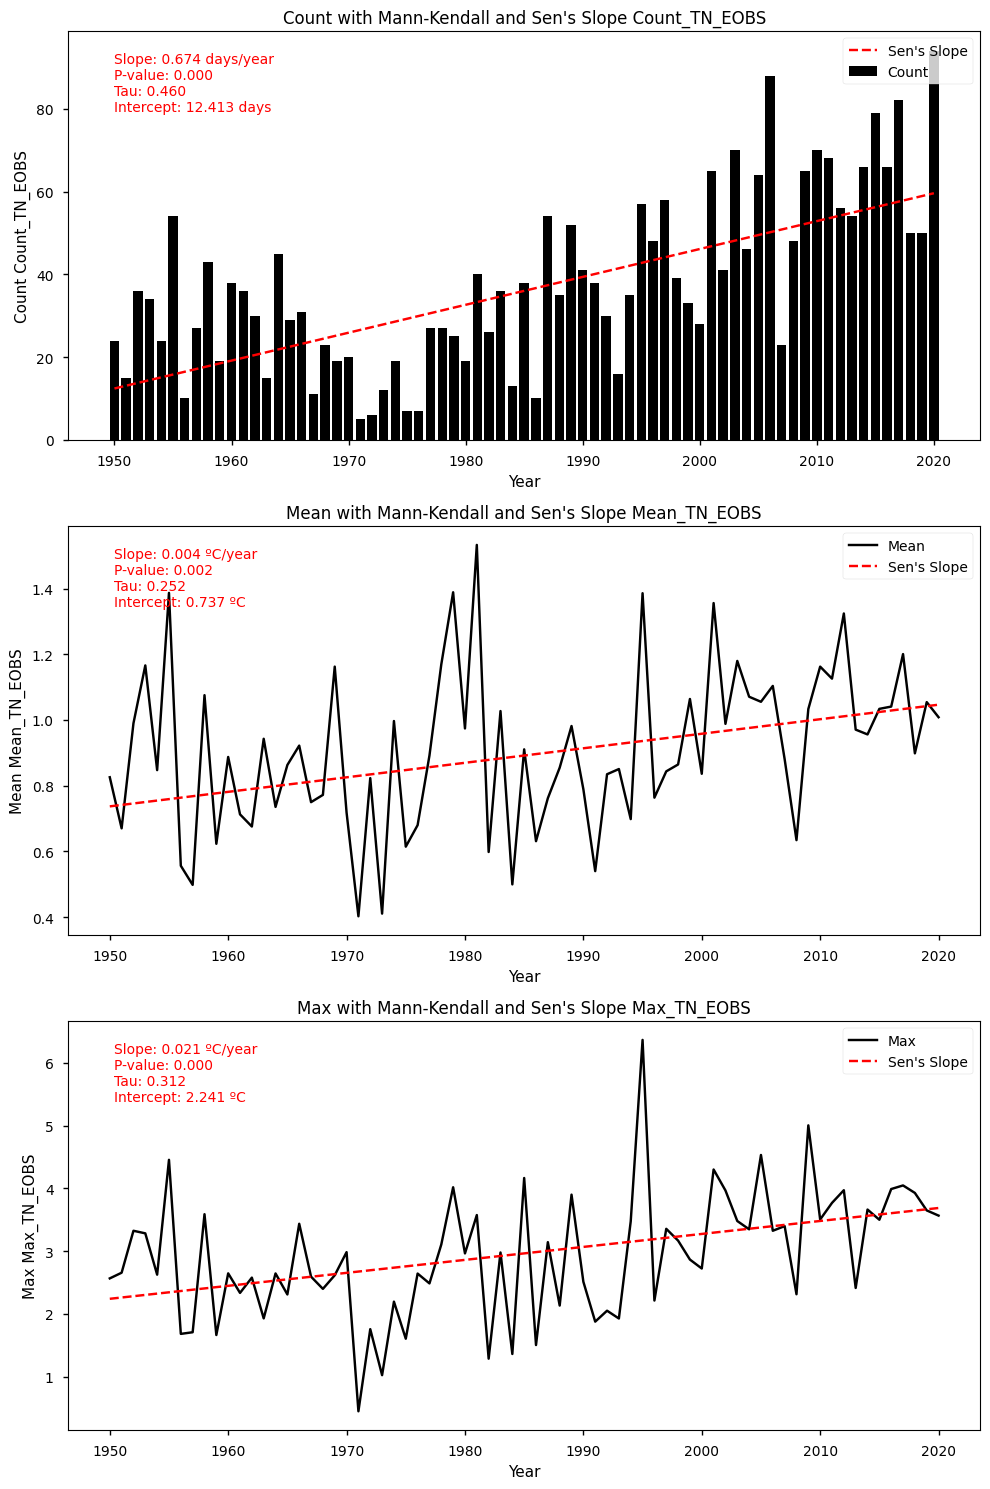

In [54]:
show_mk_sen_results(df=df_anomalies_tn_eobs_stats, name='TN_EOBS')

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.3)=
### 4.3. Trend Analysis Results for TN (ERA5 dataset)

In [55]:
dayofyear = mean_tn['time'].dt.dayofyear

# Use the dayofyear to select the corresponding p90 values
p90_tn_era5_expanded = p90_tn_ts_smooth['TN ERA5'].sel(dayofyear=dayofyear)

# Create the anomalies by subtracting the p90 values from the mean_tn values
anomalia_tn_era5 = mean_tn['TN ERA5'] - p90_tn_era5_expanded

df_anomalies_tn_era5 = pd.DataFrame({
    'Date': mean_tn['time'].values,
    'daily_weighted': mean_tn['TN ERA5'].values,
    'p90_weighted': p90_tn_era5_expanded.values,
    'anomaly': anomalia_tn_era5.values
})

In [56]:
# Replace negative values in the "anomaly" column with NaNs
df_anomalies_tn_era5['anomaly'] = df_anomalies_tn_era5['anomaly'].apply(lambda x: np.nan if x < 0 else x)

# Extract the year from the "Date" column
df_anomalies_tn_era5['Year'] = df_anomalies_tn_era5['Date'].dt.year

# Group by year to calculate the required statistics
yearly_stats = df_anomalies_tn_era5.groupby('Year').agg(
    Count_TN_ERA5=('anomaly', 'count'),
    Mean_TN_ERA5=('anomaly', 'mean'),
    Max_TN_ERA5=('anomaly', 'max')
).reset_index()

# Create the final dataframe with the results in the yearly_stats variable
df_anomalies_tn_era5_stats = yearly_stats

Mann-Kendall Test for Count: Mann_Kendall_Test(trend='increasing', h=True, p=2.0699864045070626e-10, z=6.356056759250615, Tau=0.5154929577464789, s=1281.0, var_s=40555.0, slope=0.7142857142857143, intercept=6.0)
Sen's Slope for Count: 0.7142857142857143

Mann-Kendall Test for Mean: Mann_Kendall_Test(trend='increasing', h=True, p=0.0023062399604034667, z=3.04766875019354, Tau=0.24748490945674045, s=615.0, var_s=40588.333333333336, slope=0.003788875095371753, intercept=0.6114485232833238)
Sen's Slope for Mean: 0.003788875095371753

Mann-Kendall Test for Max: Mann_Kendall_Test(trend='increasing', h=True, p=5.198526660699088e-06, z=4.556612235631384, Tau=0.3698189134808853, s=919.0, var_s=40588.333333333336, slope=0.020855249845940938, intercept=1.6916957313826522)
Sen's Slope for Max: 0.020855249845940938


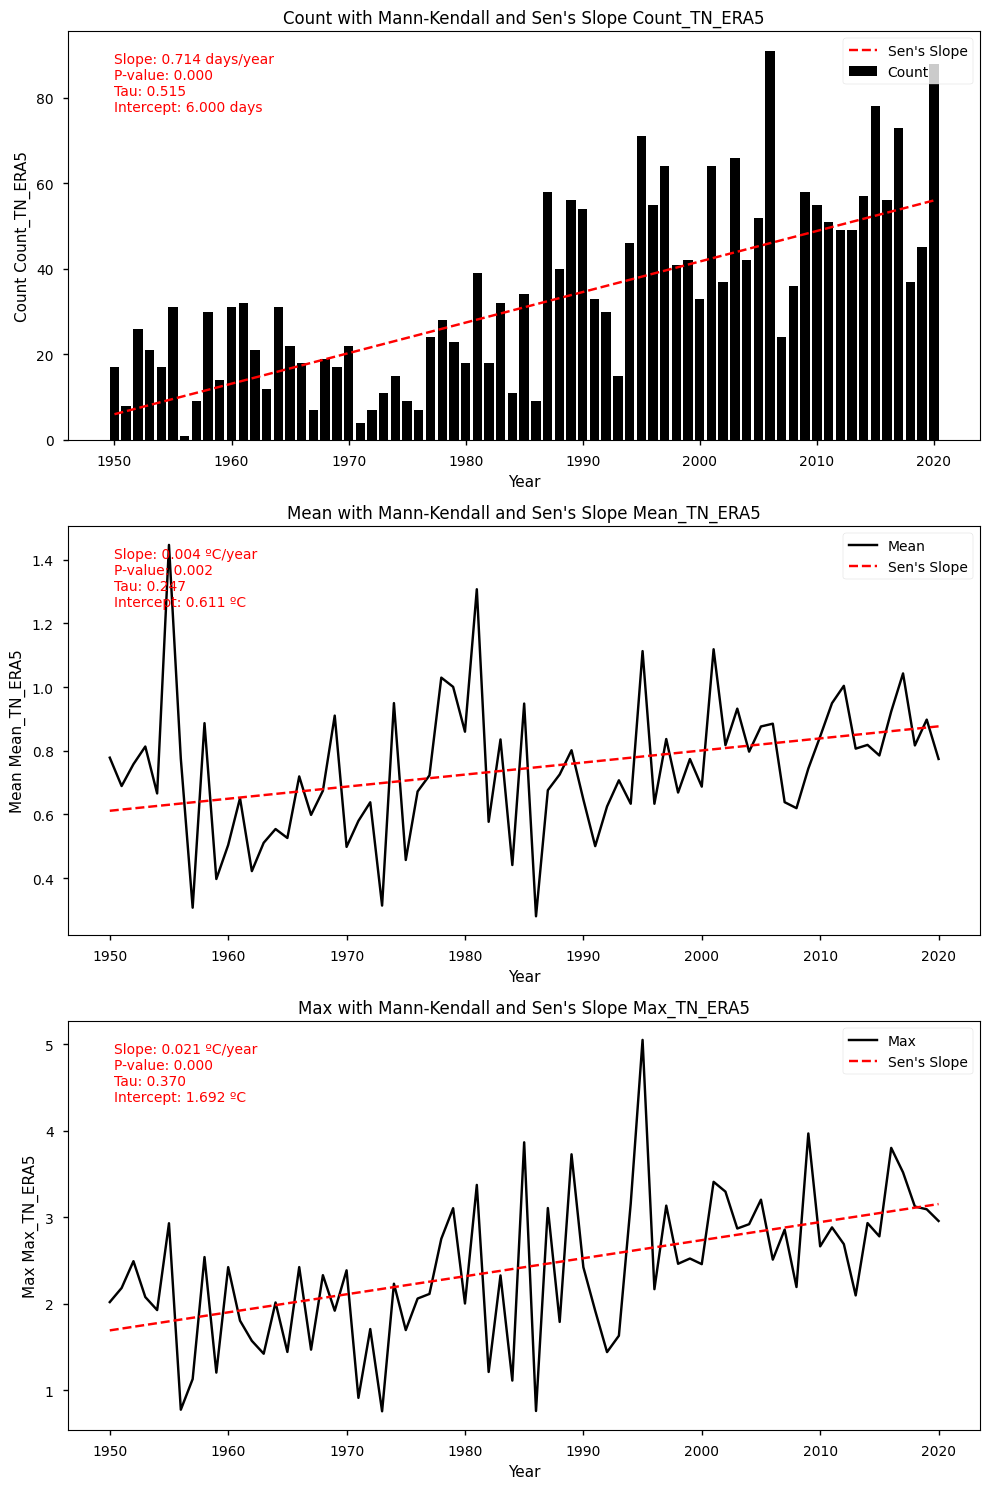

In [57]:
show_mk_sen_results(df=df_anomalies_tn_era5_stats, name='TN_ERA5')

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.4)=
### 4.4. Trend Analysis Results for TX (EOBS dataset)

In [58]:
dayofyear = mean_tx['time'].dt.dayofyear

# Use the dayofyear to select the corresponding p90 values
p90_tx_eobs_expanded = p90_tx_ts_smooth['TX EOBS'].sel(dayofyear=dayofyear)

# Create the anomalies by subtracting the p90 values from the mean_tx values
anomalia_tx_eobs = mean_tx['TX EOBS'] - p90_tx_eobs_expanded

df_anomalies_tx_eobs = pd.DataFrame({
    'Date': mean_tx['time'].values,
    'daily_weighted': mean_tx['TX EOBS'].values,
    'p90_weighted': p90_tx_eobs_expanded.values,
    'anomaly': anomalia_tx_eobs.values
})

In [59]:
# Replace negative values in the "anomaly" column with NaNs
df_anomalies_tx_eobs['anomaly'] = df_anomalies_tx_eobs['anomaly'].apply(lambda x: np.nan if x < 0 else x)

# Extract the year from the "Date" column
df_anomalies_tx_eobs['Year'] = df_anomalies_tx_eobs['Date'].dt.year

# Group by year to calculate the required statistics
yearly_stats = df_anomalies_tx_eobs.groupby('Year').agg(
    Count_TX_EOBS=('anomaly', 'count'),
    Mean_TX_EOBS=('anomaly', 'mean'),
    Max_TX_EOBS=('anomaly', 'max')
).reset_index()

# Create the final dataframe with the results in the yearly_stats variable
df_anomalies_tx_eobs_stats = yearly_stats

Mann-Kendall Test for Count: Mann_Kendall_Test(trend='increasing', h=True, p=5.757327947719659e-11, z=6.549906290887314, Tau=0.5311871227364185, s=1320.0, var_s=40552.666666666664, slope=0.75, intercept=10.75)
Sen's Slope for Count: 0.75

Mann-Kendall Test for Mean: Mann_Kendall_Test(trend='increasing', h=True, p=7.56304622129278e-06, z=4.477194157450445, Tau=0.36338028169014086, s=903.0, var_s=40588.333333333336, slope=0.009399604694916111, intercept=0.8641609749641108)
Sen's Slope for Mean: 0.009399604694916111

Mann-Kendall Test for Max: Mann_Kendall_Test(trend='increasing', h=True, p=1.4364622018536721e-05, z=4.338212520633801, Tau=0.352112676056338, s=875.0, var_s=40588.333333333336, slope=0.034538105625027765, intercept=2.640952052441753)
Sen's Slope for Max: 0.034538105625027765


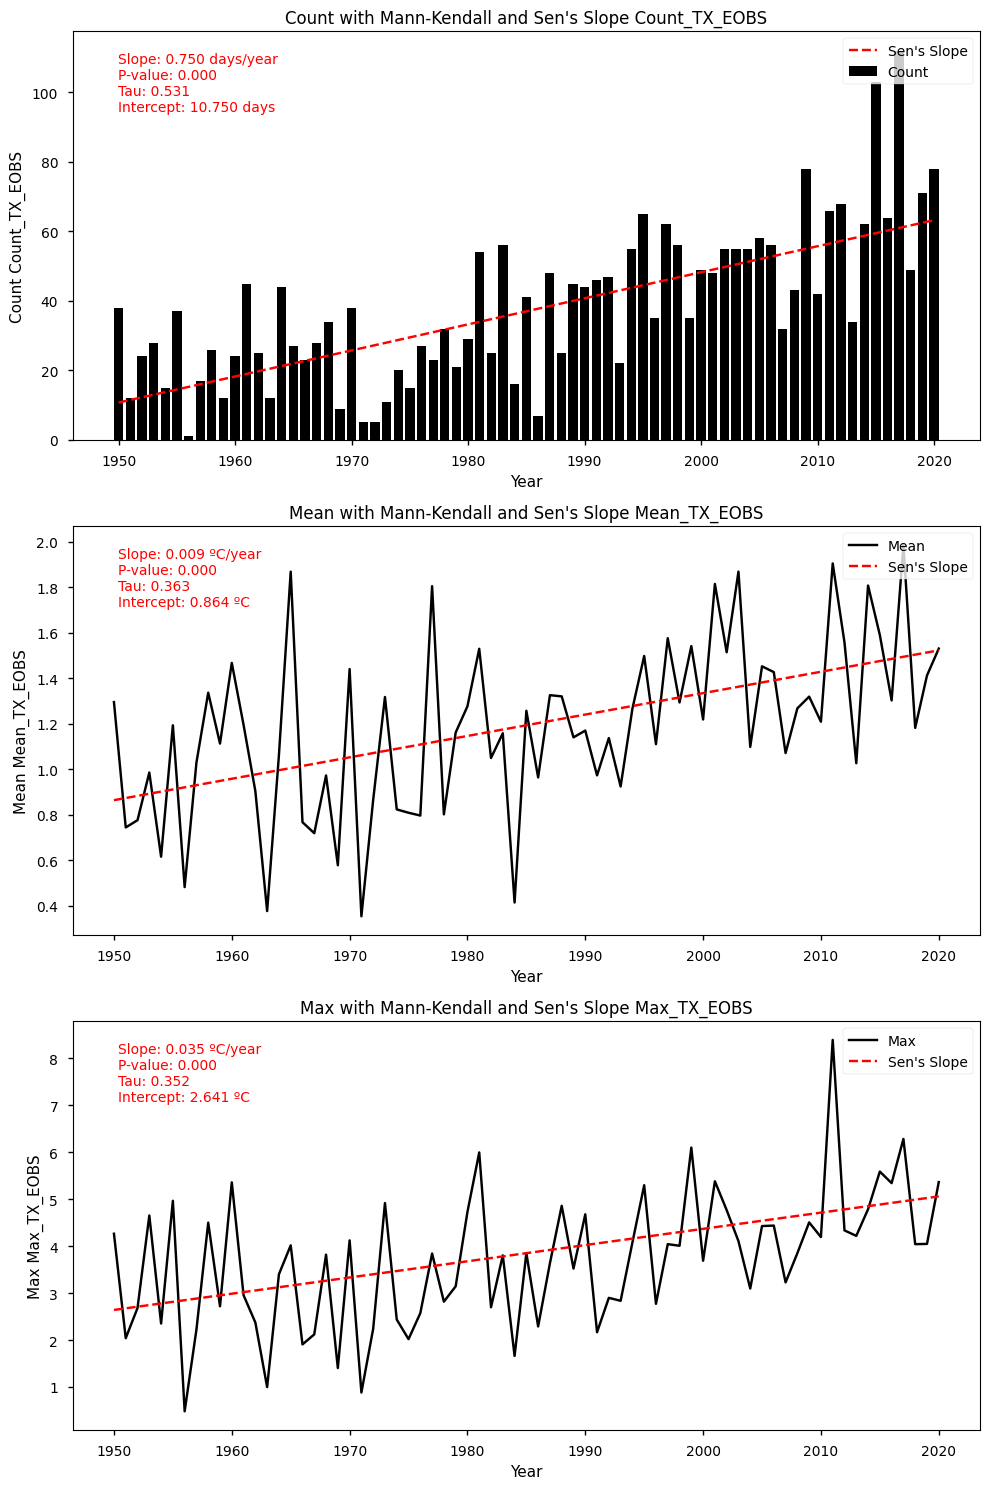

In [60]:
show_mk_sen_results(df=df_anomalies_tx_eobs_stats, name='TX_EOBS')

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-4.5)=
### 4.5. Trend Analysis Results for TX (ERA5 dataset)

In [61]:
dayofyear = mean_tx['time'].dt.dayofyear

# Use the dayofyear to select the corresponding p90 values
p90_tx_era5_expanded = p90_tx_ts_smooth['TX ERA5'].sel(dayofyear=dayofyear)

# Create the anomalies by subtracting the p90 values from the mean_tx values
anomalia_tx_era5 = mean_tx['TX ERA5'] - p90_tx_era5_expanded

df_anomalies_tx_era5 = pd.DataFrame({
    'Date': mean_tx['time'].values,
    'daily_weighted': mean_tx['TX ERA5'].values,
    'p90_weighted': p90_tx_era5_expanded.values,
    'anomaly': anomalia_tx_era5.values
})

In [62]:
# Replace negative values in the "anomaly" column with NaNs
df_anomalies_tx_era5['anomaly'] = df_anomalies_tx_era5['anomaly'].apply(lambda x: np.nan if x < 0 else x)

# Extract the year from the "Date" column
df_anomalies_tx_era5['Year'] = df_anomalies_tx_era5['Date'].dt.year

# Group by year to calculate the required statistics
yearly_stats = df_anomalies_tx_era5.groupby('Year').agg(
    Count_TX_ERA5=('anomaly', 'count'),
    Mean_TX_ERA5=('anomaly', 'mean'),
    Max_TX_ERA5=('anomaly', 'max')
).reset_index()

# Create the final dataframe with the results in the yearly_stats variable
df_anomalies_tx_era5_stats = yearly_stats

Mann-Kendall Test for Count: Mann_Kendall_Test(trend='increasing', h=True, p=1.4233059175694507e-13, z=7.394155143226771, Tau=0.5995975855130785, s=1490.0, var_s=40552.0, slope=1.054054054054054, intercept=-0.8918918918918877)
Sen's Slope for Count: 1.054054054054054

Mann-Kendall Test for Mean: Mann_Kendall_Test(trend='increasing', h=True, p=4.958416496059215e-06, z=4.566539495404001, Tau=0.37062374245472834, s=921.0, var_s=40588.333333333336, slope=0.007356197404541631, intercept=0.6949144669299809)
Sen's Slope for Mean: 0.007356197404541631

Mann-Kendall Test for Max: Mann_Kendall_Test(trend='increasing', h=True, p=2.573825959029108e-07, z=5.152247821988428, Tau=0.4181086519114688, s=1039.0, var_s=40588.333333333336, slope=0.03324259472675381, intercept=1.7215139095701961)
Sen's Slope for Max: 0.03324259472675381


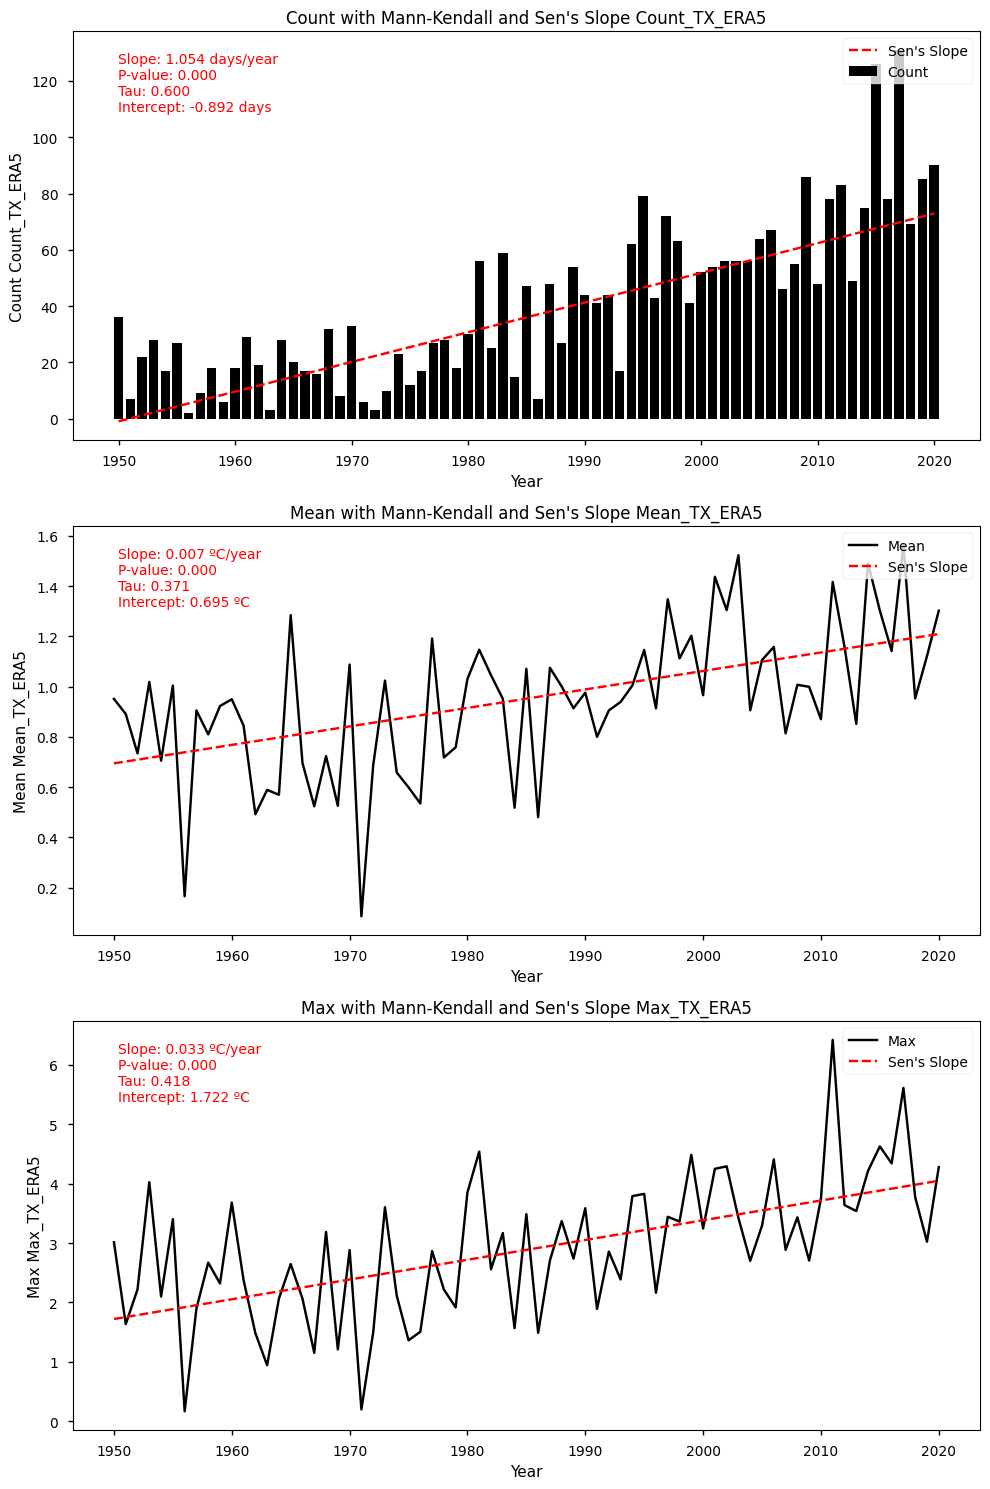

In [63]:
show_mk_sen_results(df=df_anomalies_tx_era5_stats, name='TX_ERA5')

In [64]:
# Expand the 90th percentile data to match the full time series
percentiles_expanded = p90_data_tn.sel(dayofyear=merged_tn['dayofyear'])



# Calculate the difference from the 90th percentile
diff_eobs = merged_tn['TN EOBS'] - percentiles_expanded['TN EOBS']
diff_era5 = merged_tn['TN ERA5'] - percentiles_expanded['TN ERA5']

diff_eobs, diff_era5

<xarray.DataArray 'TN EOBS' (time: 25933, latitude: 32, longitude: 44)>
dask.array<sub, shape=(25933, 32, 44), dtype=float64, chunksize=(1, 32, 44), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 0.375 0.625 0.875
  * latitude   (latitude) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365 366
    quantile   float64 0.9

In [66]:
# Create a mask for positive days
positive_mask_eobs = diff_eobs > 0
positive_mask_era5 = diff_era5 > 0

# Resample by year and count positive days
positive_days_per_year_eobs = positive_mask_eobs.resample(time='1Y').sum(dim='time')
positive_days_per_year_era5 = positive_mask_era5.resample(time='1Y').sum(dim='time')

positive_days_per_year_eobs, positive_days_per_year_era5

In [68]:

# Function to calculate trend and significance
def calculate_trend_and_significance(data_array):
    # Ensure the input array is a DataArray
    if not isinstance(data_array, xr.DataArray):
        raise ValueError("Input must be an xarray DataArray")

    # Rechunk the time dimension to a single chunk
    data_array = data_array.chunk({"time": -1})

    # Get the time dimension name
    time_dim = 'time'

    # Calculate the slope using np.polyfit
    def polyfit_slope(y):
        x = np.arange(len(y))
        return np.polyfit(x, y, 1)[0]

    slope = xr.apply_ufunc(
        polyfit_slope,
        data_array,
        vectorize=True,
        input_core_dims=[[time_dim]],
        dask="parallelized",
        output_dtypes=[float]
    )

    # Apply Mann-Kendall test
    def mann_kendall_p(x):
        return original_test(x).p

    significance = xr.apply_ufunc(
        mann_kendall_p,
        data_array,
        vectorize=True,
        input_core_dims=[[time_dim]],
        dask="parallelized",
        output_dtypes=[float]
    )
    return slope, significance

slope_eobs, significance_eobs = calculate_trend_and_significance(positive_days_per_year_eobs)
slope_era5, significance_era5 = calculate_trend_and_significance(positive_days_per_year_era5)

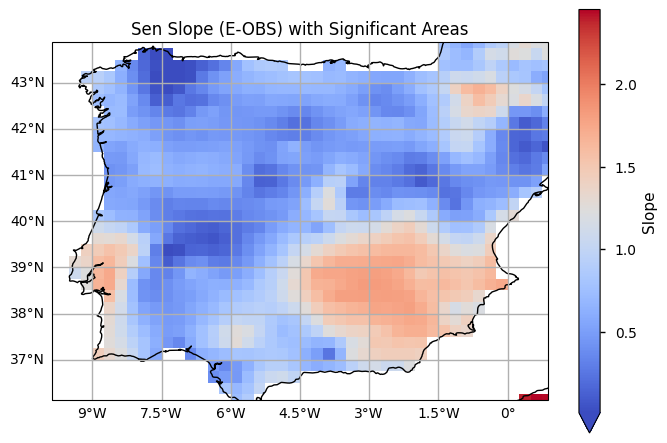

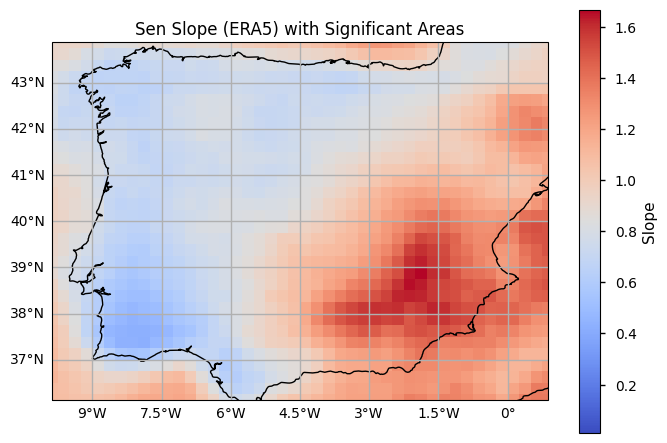

In [69]:
def plot_maps(da, **kwargs):
    # Get longitude and latitude extents
    lon_min, lon_max = np.min(da.longitude), np.max(da.longitude)
    lat_min, lat_max = np.min(da.latitude), np.max(da.latitude)
    
    # Plot using PlateCarree projection
    facet = da.plot.pcolormesh(
        subplot_kws={"projection": ccrs.PlateCarree()}, 
        transform=ccrs.PlateCarree(),
        **kwargs
    )
    
    # Set extent, add coastlines, and gridlines
    ax = facet.axes
    ax.set_extent(
        [lon_min, lon_max, lat_min, lat_max],
        crs=ccrs.PlateCarree(),
    )
    ax.coastlines(lw=1)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False

# Plot the results
plot_maps(slope_eobs.where(slope_eobs != 0), cmap='coolwarm', vmin=0.01, cbar_kwargs={'label': 'Slope'})
plt.title('Sen Slope (E-OBS) with Significant Areas')
plt.show()

plot_maps(slope_era5.where(slope_era5 != 0), cmap='coolwarm', vmin=0.01, cbar_kwargs={'label': 'Slope'})
plt.title('Sen Slope (ERA5) with Significant Areas')
plt.show()

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ2_v1.13:code-section-5)=
### 5. Main takeaways

- The study analyzed annual minimum and maximum temperatures over the Iberian Peninsula using E-OBS and ERA5 datasets for specified time periods.

- The year of 1956 exhibited the most extreme minimum temperatures. ERA5 data showed similar trends to E-OBS but generally overestimated these temperatures. Accordingly to [Bell et al.(2021)](https://doi.org/10.1002/QJ.4174), the discrepancies observed in minimum temperature estimates between ERA5 and E-OBS can be attributed to differences in gridding methods and station coverage, highlighting the importance of ensemble-based uncertainty estimation. 

- The year 2017 exhibited the most extreme maximum temperatures. In this case, ERA5 data again showed similar trends to E-OBS, but E-OBS tended to overestimate the temperatures. Consistent with the findings in [Bell et al., (2021)](https://doi.org/10.1002/QJ.4174), the overestimation of maximum temperatures by E-OBS compared to ERA5 may result from the spatial variation influenced by station density and gridding method discrepancies.

- E-OBS appears to be more sensitive to higher temperatures, showing higher maximum values, while ERA5 is more responsive to lower temperatures. However, it's notable that ERA5 underestimates extreme cold days and heat days compared to E-OBS. This statement was also provided by [Cornes et al. (2018)](https://doi.org/10.1029/2017JD028200), which observed that underestimating true uncertainty in data-sparse regions in E-OBS might contribute to the overestimation of temperatures noted in the main takeaways.

- Both datasets indicate a small, positive, and increasing trend in the mean anomalies for both minimum (TN) and maximum (TX) temperatures, with similar values observed between the two datasets.

- When comparing the 90th percentile of weighted daily minimum temperatures, ERA5 tends to show higher values than E-OBS in both smoothed and non-smoothed data. For maximum temperatures, E-OBS tends to show higher values than ERA5 in both smoothed and non-smoothed data.


## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entries for the data used were:
* E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations:
    https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-europe?tab=overview
* ERA5 hourly data on single levels from 1940 to present: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=overview 


Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

[[1]](https://library.wmo.int/index.php?lvl=notice_display&id=20130) World Meteorological Organization (WMO), Guidelines on the Calculation of Climate Normals.

[[2]](https://epic.awi.de/id/eprint/49274/1/ClimPACTv2_manual.pdf) Alexander and Herold. 2016: ClimPACT2 Indices and Software, University and of S. Wales, Sydney, Australia.

[[3]](https://confluence.ecmwf.int/display/CKB/E-OBS+daily+gridded+observations+for+Europe+from+1950+to+present%3A+Product+user+guide) E-OBS daily gridded observations for Europe from 1950 to present: Product user guide.

[[4]]( https://doi.org/10.1029/2017JD028200) Cornes, R., G. van der Schrier, E.J.M. van den Besselaar, and P.D. Jones. 2018: An Ensemble Version of the E-OBS Temperature and Precipitation Datasets, J. Geophys. Res. (Atmospheres), 123.

[[5]](https://doi.org/10.1002/QJ.4174)Bell, Bill, Hans Hersbach, Adrian Simmons, Paul Berrisford, Per Dahlgren, András Horányi, Joaquín Muñoz-Sabater, et al. 2021. “The ERA5 Global Reanalysis: Preliminary Extension to 1950.” Quarterly Journal of the Royal Meteorological Society 147 (741): 4186–4227. 

[[6]](https://climate.copernicus.eu/esotc/2023) Copernicus Climate Change Service (C3S), 2024.
